In [21]:
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
data=pd.read_csv('shopping_data.csv')

In [24]:
data.shape

(200, 5)

In [25]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [27]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
#For Clustering ,we will remove the Cutomer ID,Gender & Age 
#And consider only Annual Income and Spending Score.

In [34]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [37]:
customer=data[['Annual Income (k$)',
       'Spending Score (1-100)']]
customer.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [38]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [39]:
Z= linkage(customer,'ward')

Text(0, 0.5, 'Linkage Distance')

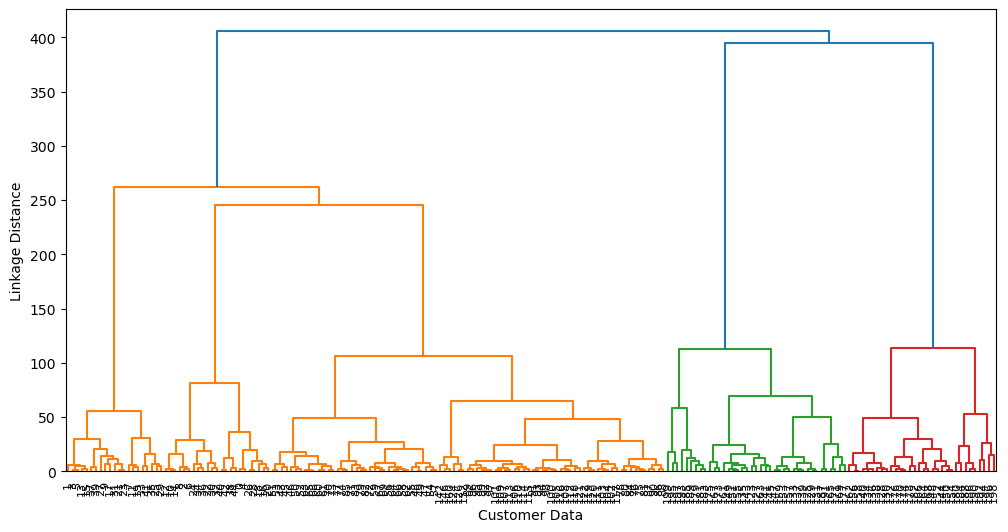

In [40]:
plt.figure(figsize=(12,6))
dendrogram(Z,leaf_rotation=90., leaf_font_size=8)
plt.xlabel('Customer Data')
plt.ylabel('Linkage Distance')


In [41]:
#If we draw horizonatal line that passes through log. distance withouta horz line,
#we get 5 clusters. 

In [42]:
from sklearn.cluster import AgglomerativeClustering
agg= AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
clusters=agg.fit_predict(customer)

In [43]:
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [44]:
customer['Cluster']=clusters

C:\Users\17029\AppData\Local\Temp\ipykernel_9756\1287611725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['Cluster']=clusters


In [45]:
customer.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


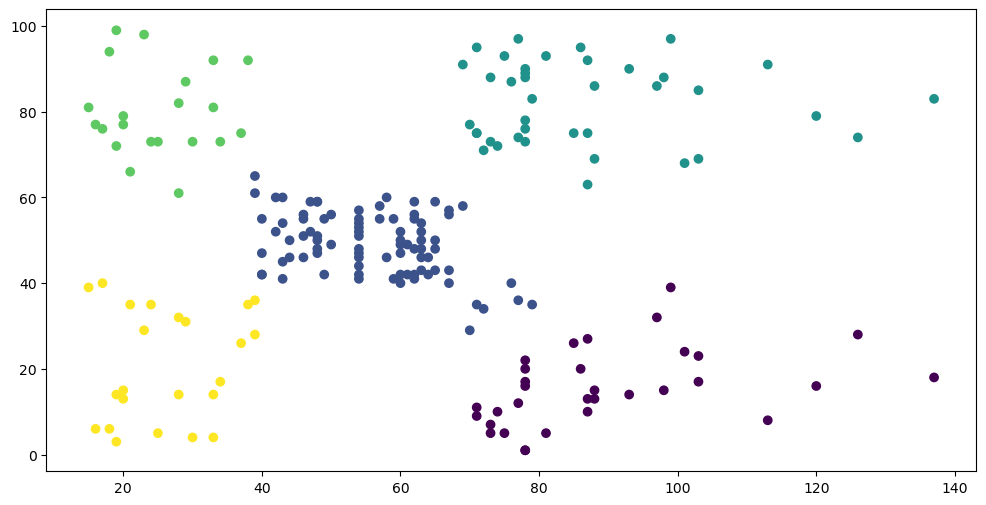

In [53]:
plt.figure(figsize=(12,6))
plt.scatter(customer['Annual Income (k$)'],
            customer['Spending Score (1-100)'],
           c=customer['Cluster'],cmap='viridis')